# Module 7- Task 3
## Jordan Wheeler
## 26 February 2023

In [5]:
# This task walks through time series and simple linear regression

In [6]:
# Import MatPlotlib

%matplotlib inline

c = lambda f: 5 / 9 * (f - 32)

In [7]:
temps = [(f, c(f)) for f in range (0, 101, 10)]

In [8]:
# Import Pandas

import pandas as pd

In [11]:
# Build DataFrame

temps_df = pd.DataFrame(temps, columns=['Fahrenheit', 'Celsius'])

## Plot Method

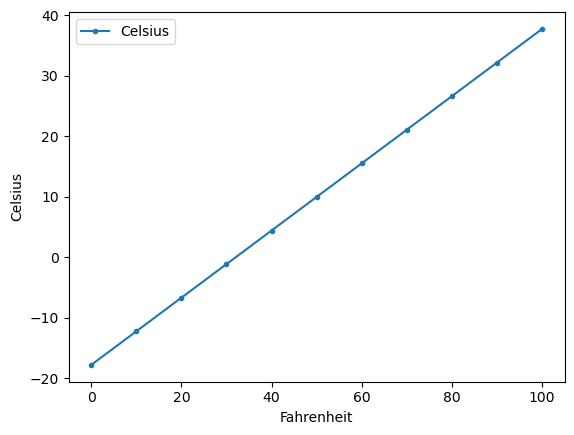

In [12]:
# Build Axes

axes = temps_df.plot(x='Fahrenheit', y='Celsius', style='.-')

# Y Label

y_label = axes.set_ylabel('Celsius')

## Loading the Average High Temperatures into a DataFrame

In [13]:
# Load Data

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

## View Data

In [15]:
# View Head

nyc.head()

,Date,Value,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9
3,189801,39.6,2.2
4,189901,36.4,-1.0


In [16]:
# View Tail

nyc.tail()

,Date,Value,Anomaly
119,201401,35.5,-1.9
120,201501,36.1,-1.3
121,201601,40.8,3.4
122,201701,42.8,5.4
123,201801,38.7,1.3


## Clean Data

In [17]:
# Rename Columns

nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [18]:
# View Top 3 Lines with renamed columns

nyc.head(3)

,Date,Temperature,Anomaly
0,189501,34.2,-3.2
1,189601,34.7,-2.7
2,189701,35.5,-1.9


In [19]:
# Check column's type

nyc.Date.dtype

dtype('int64')

In [20]:
# Leave just the year since every value is January. Use floordiv for integer division on every element

nyc.Date = nyc.Date.floordiv(100)

In [21]:
# View Updates

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Describe Data

In [24]:
# Set precision and View statistics

pd.set_option('display.precision', 2)

nyc.Temperature.describe()

count    124.00
mean      37.60
std        4.54
min       26.10
25%       34.58
50%       37.60
75%       40.60
max       47.60
Name: Temperature, dtype: float64

The data seems to be normal. The standard deviation is low and when we look at the difference between the mean and the 
minimum/maximum, there is a relatively equal spread.

## Forecasting Futrue January Average High Temperatures

In [25]:
# Import SciPy

from scipy import stats

In [26]:
# Linear Regression

linear_regression = stats.linregress(x=nyc.Date,
                                     y=nyc.Temperature)

In [27]:
# Find Slope

linear_regression.slope

0.014771361132966163

In [28]:
# Find Intercept

linear_regression.intercept

8.694993233674289

## Predictions

In [29]:
# Predict average Fahrenheit for January of 2019

linear_regression.slope * 2019 + linear_regression.intercept

38.51837136113297

In [30]:
# Approximate Average Temperature for 1890

linear_regression.slope * 1890 + linear_regression.intercept

36.612865774980335

In [37]:
# Estimate for 2026

linear_regression.slope * 2026 + linear_regression.intercept

38.62177088906374

## Plotting Average High Temperatures and a Regression Line

In [33]:
# Import Seaborn

import seaborn as sns

(10.0, 70.0)

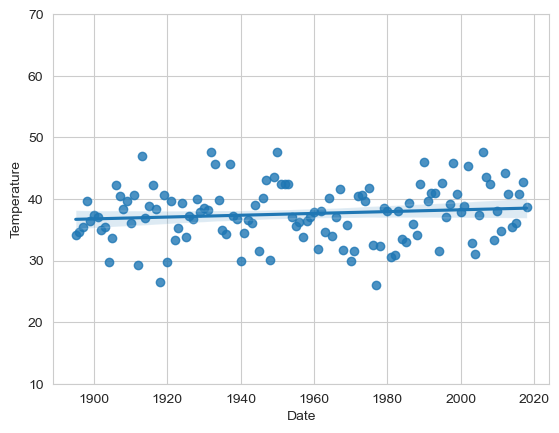

In [36]:
# Scatter Plot with Best Fit Line

sns.set_style('whitegrid')

axes = sns.regplot(x=nyc.Date, y=nyc.Temperature)

# Slim the range

axes.set_ylim(10, 70)

## Time Series and Simple Linear Regression with scikit-learn estimator

In [63]:
# Load Average High Temperatures into a DataFrame

import pandas as pd

In [64]:
# Load Data

nyc = pd.read_csv('ave_hi_nyc_jan_1895-2018.csv')

In [65]:
# Rename Columns

nyc.columns = ['Date', 'Temperature', 'Anomaly']

In [66]:
# Use Floordiv to clean data

nyc.Date = nyc.Date.floordiv(100)

In [67]:
# Display Head

nyc.head(3)

,Date,Temperature,Anomaly
0,1895,34.2,-3.2
1,1896,34.7,-2.7
2,1897,35.5,-1.9


## Splitting the Data for Training and Testing

In [68]:
# Import sklearn

from sklearn.model_selection import train_test_split

In [69]:
# Build 2D array

X_train, X_test, y_train, y_test = train_test_split(nyc.Date.values.reshape(-1, 1), nyc.Temperature.values, random_state=11)

In [70]:
# Check X Shape

X_train.shape

(93, 1)

In [71]:
# X Test

X_test.shape

(31, 1)

## Train the Model

In [72]:
# Call Linear Regression

from sklearn.linear_model import LinearRegression

In [73]:
# Create Function

linear_regression = LinearRegression()

In [74]:
# Fit Model

linear_regression.fit(X=X_train, y=y_train)

LinearRegression()

In [75]:
# Get Slope

linear_regression.coef_

array([0.01939167])

In [76]:
# Get Intercept

linear_regression.intercept_

-0.30779820252657686

## Test The Model

In [77]:
# Predicted Values

predicted = linear_regression.predict(X_test)

In [78]:
# Utilize Y for expected values

expected = y_test

In [79]:
# Show the predicted and expected values

for p, e in zip(predicted[::5], expected [::5]):
    print(f'predicted: {p:.2f}, expected: {e:.2f}')

predicted: 37.86, expected: 31.70
predicted: 38.69, expected: 34.80
predicted: 37.00, expected: 39.40
predicted: 37.25, expected: 45.70
predicted: 38.05, expected: 32.30
predicted: 37.64, expected: 33.80
predicted: 36.94, expected: 39.70


## Predicting New Values

In [80]:
# Utilize y=mx+b. coef_ will be the m and b will be the intercept

In [83]:
# Predict Function

predict = (lambda x: linear_regression.coef_*x+
           linear_regression.intercept_)

In [84]:
# Predict 2019

predict(2019)

array([38.84399018])

In [85]:
# Predict 1890

predict(1890)

array([36.34246432])

## Visualize Dataset with the Regression Line

In [86]:
# Import Seaborn

import seaborn as sns

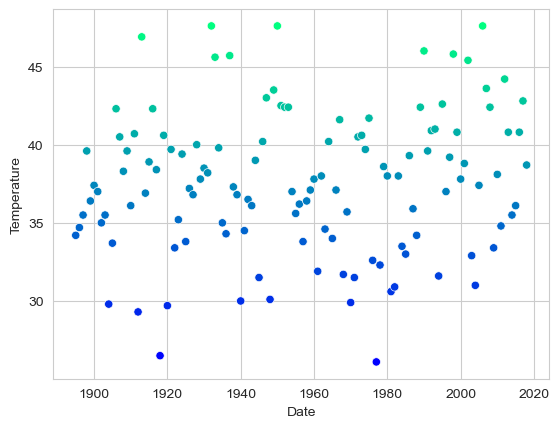

In [89]:
# Build Chart

axes = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature', hue = 'Temperature', palette = 'winter', legend = False)

In [90]:
# Trim the Axes

axes.set_ylim(10, 70)

(10.0, 70.0)

In [91]:
# Import Numpy

import numpy as np

# Build Array

x = np.array([min(nyc.Date.values), max(nyc.Date.values)])

In [92]:
# Predict Values for Array

y = predict(x)

In [93]:
# Import matplotlib

import matplotlib.pyplot as plt

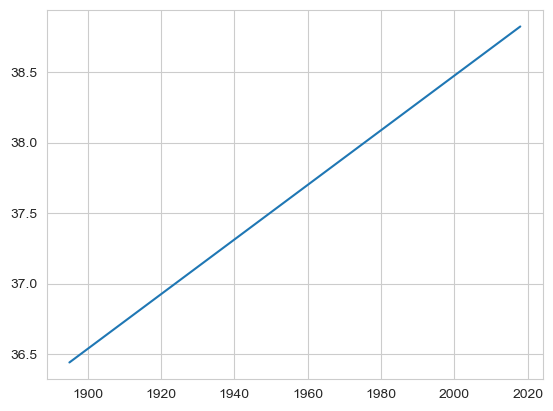

In [95]:
# Draw the Line

line = plt.plot(x, y)

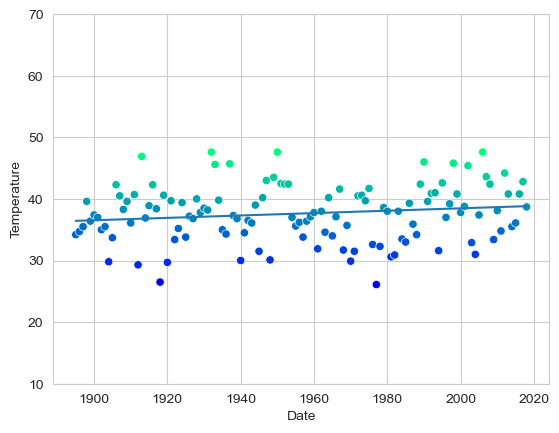

In [97]:
# Visualize Together

axes = sns.scatterplot(data = nyc, x = 'Date', y = 'Temperature', hue = 'Temperature', palette = 'winter', legend = False)
axes.set_ylim(10, 70)
x = np.array([min(nyc.Date.values), max(nyc.Date.values)])
y = predict(x)
line = plt.plot(x, y)

## Comparing Methods

The first thing that stood out to me was the uses of both tools. Both tools have their time and place. Sklean seems to be more of an asset
when we consider predictions whereas the simple linear regression seems to be better suited for exploring your analysis. The simple linear regression was based of the slope intercept formula and you inputting the information to make the prediction work. While this does not pose much of a threat, it can lead to more human error. When using sklearn you have the simple predict() function to take away some of the error. I noticed that in the first method, we were able to see more statistics with our information which I liked as we can assume an accuracy level with our data and give us more to analyze. Sklearn is setup to allow for multiple linear regression which again speaks to its value as a prediciton tool. 

Overall, I would say that if I need to predict information, I would rather use sklearn. I feel that it is setup to allow for an easier time predicting and would require less input. When analyzing data, and when only needing simple linear regression, I feel that move is best. It proivdes the deeper statistical information to make a better analysis. 